In [1]:
%matplotlib notebook

In [2]:
import matplotlib.ticker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
frame = pd.read_csv("data/interim/sampling-frame.tsv", sep = "\t")

# Frame stratification

In [4]:
pd.DataFrame(frame["project_group"].value_counts())

,project_group
enwiki,17573
dewiki,3319
jawiki,2831
frwiki,2640
cee_wps,2554
commons,2084
ruwiki,1952
eswiki,1683
zhwiki,1653
itwiki,1310


In [5]:
# Round the highest edit count up to the nearest hundred thousand,
# in order to make a pretty edge for the top bin
top_edge = int(np.ceil(frame["global_edits"].max() / 100000) * 100000)

# See readme for why we picked these bins
edit_bins = [10, 30, 150, 600, 1200, top_edge]

frame["binned_edits"] = pd.cut(frame["global_edits"], edit_bins, right=False)

In [6]:
frame["binned_edits"].value_counts(sort = False)

[10, 30)           3014
[30, 150)         13359
[150, 600)        11957
[600, 1200)        4657
[1200, 700000)     9976
Name: binned_edits, dtype: int64

In [7]:
frame.groupby(["project_group", "binned_edits"]).size().unstack()

binned_edits,"[10, 30)","[30, 150)","[150, 600)","[600, 1200)","[1200, 700000)"
project_group,,,,,
arwiki,31,97,47,21,40
asia_wps,41,174,138,51,101
cee_wps,157,657,674,302,764
commons,165,545,395,201,778
dewiki,121,841,967,425,965
enwiki,1189,5635,5171,1867,3711
eswiki,174,585,418,188,318
frwiki,142,752,713,297,736
itwiki,98,380,349,142,341


# Distribution of yearly edit counts

<IPython.core.display.Javascript object>


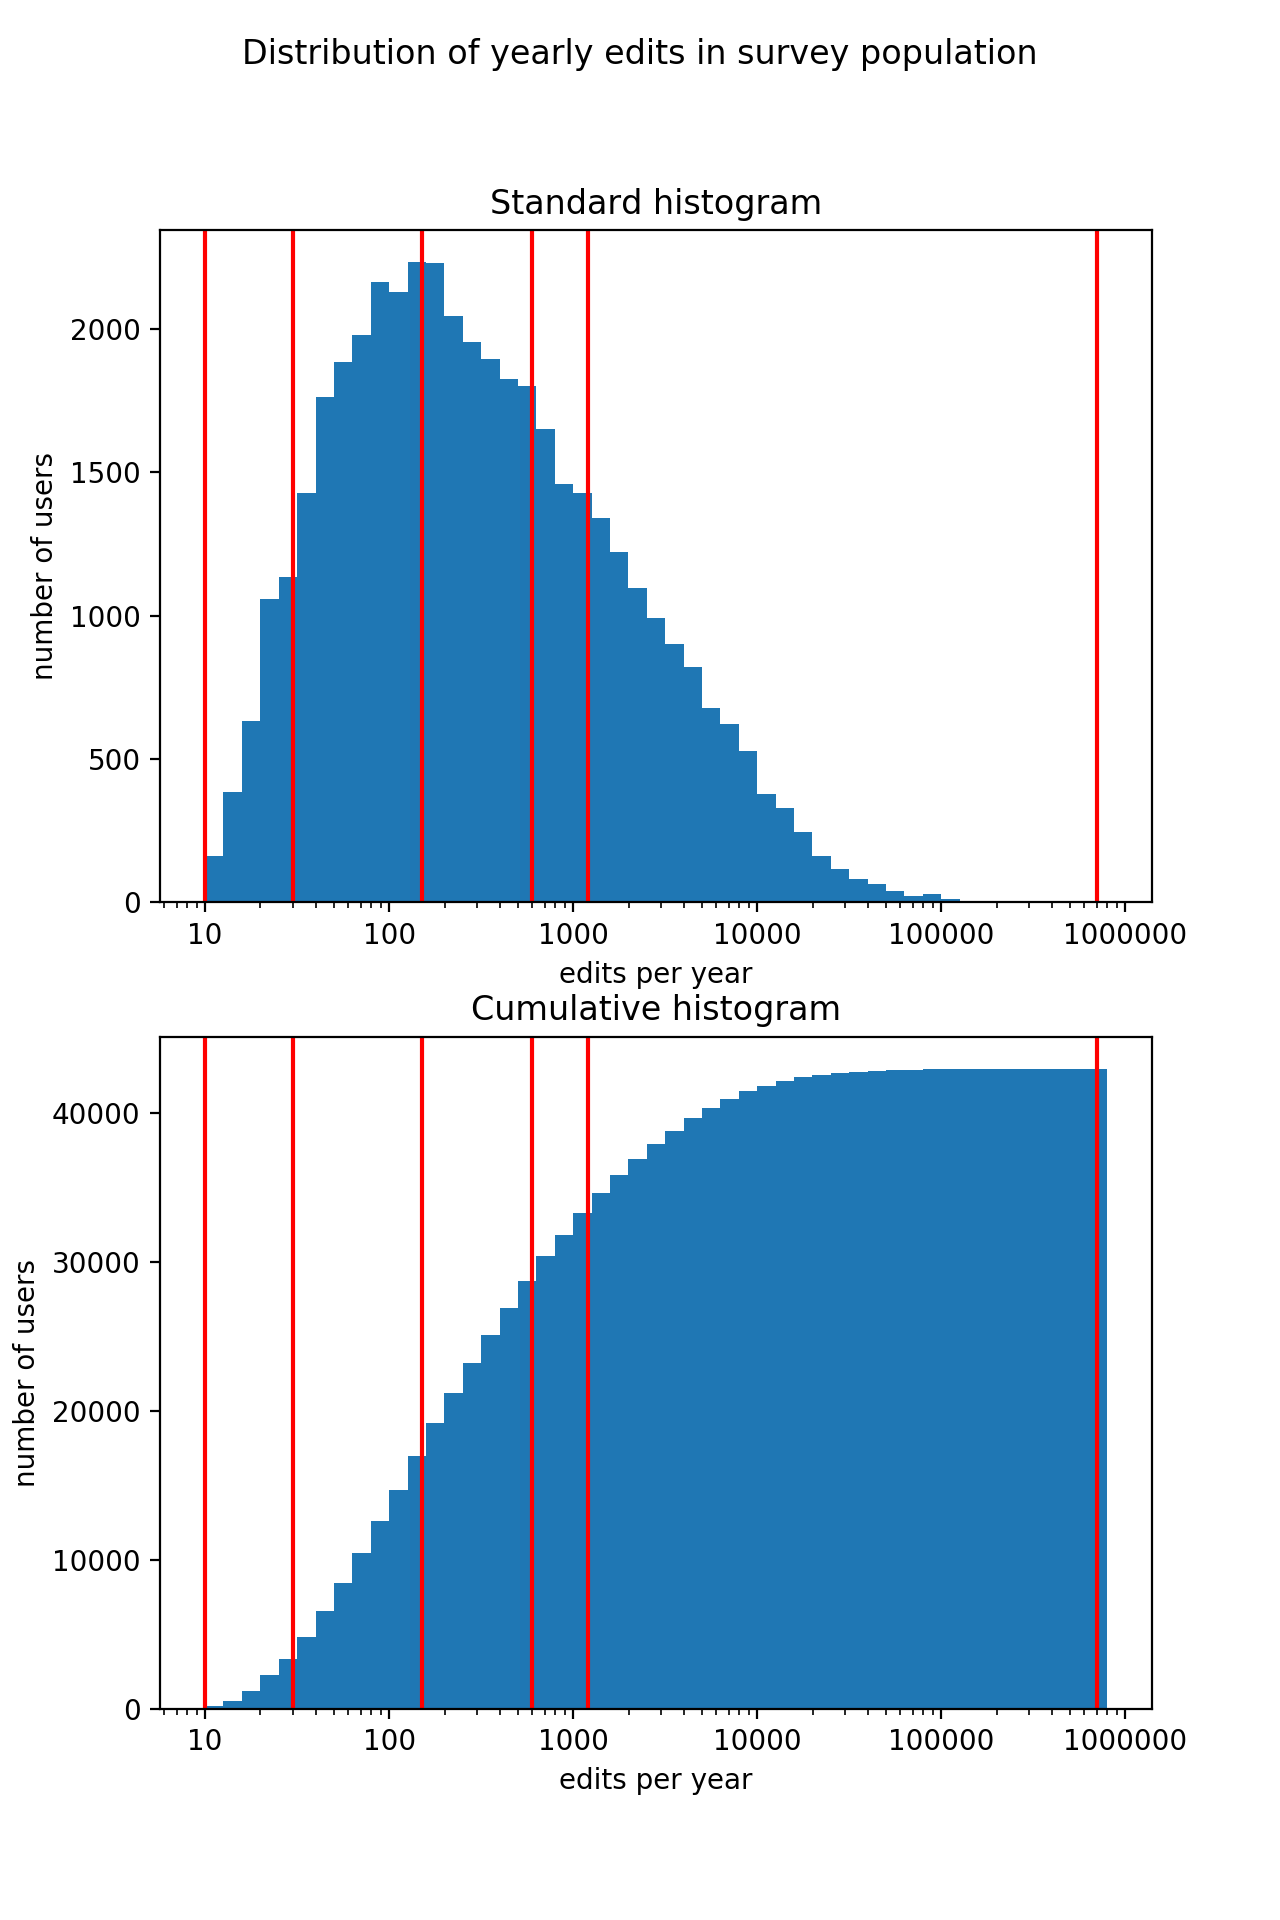

In [8]:
fig_size = plt.rcParams["figure.figsize"]

fig, (ax1, ax2) = plt.subplots(
    # 2 rows, 1 column
    2, 1,
    # Make the figure double height
    figsize = (fig_size[0], fig_size[1] * 2),
)

fig.suptitle("Distribution of yearly edits in survey population")

def set_common(ax, cumulative = False):
    ax.hist(
        frame["global_edits"],
        bins = 10**np.arange(1, 6, 0.1),
        cumulative = cumulative
    )
    
    ax.set_xscale("log", basex = 10)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
    
    
    ax.set_ylabel("number of users")
    ax.set_xlabel("edits per year")

    for edge in edit_bins:
        ax.axvline(x = edge, color = "red")

set_common(ax1)
set_common(ax2, True)
ax1.set_title("Standard histogram")
ax2.set_title("Cumulative histogram")

plt.show()